In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
match_data=pd.read_csv("IPL Matches 2008-2020.csv")
ball_data=pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [27]:
match_data.shape

(816, 17)

In [28]:
ball_data.shape

(193468, 18)

In [29]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [30]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [31]:
teams=match_data['team1'].unique()
teams

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [32]:
win_arr=[]
for team in teams:
    count=0
    for winner in match_data['winner']:
        if team==winner:
            count=count+1
    win_arr.append(count)
print(win_arr)

[91, 88, 67, 120, 99, 81, 29, 106, 6, 12, 66, 13, 5, 10, 19]


In [33]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [34]:
ball_data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [35]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [36]:
print('Total Matches Played so far:',match_data.shape[0],'\n')
print('Venues Played at:',match_data['city'].unique(),'\n')
print('Teams Participated:',match_data['team1'].unique(),'\n')

Total Matches Played so far: 816 

Venues Played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'] 

Teams Participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'] 



In [37]:
match_data['Season']=pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [60]:
match_per_season=match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'Matches'})
match_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017'),
  Text(10, 0, '2018'),
  Text(11, 0, '2019'),
  Text(12, 0, '2020')])

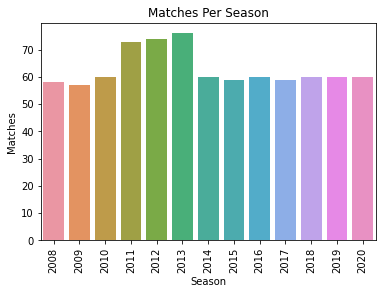

In [39]:
sns.barplot(x='Season',y='Matches',data=match_per_season)
plt.title('Matches Per Season')
plt.xticks(rotation='90')

In [266]:
season_data=match_data[['id','Season']].merge(ball_data,left_on='id',right_on='id',how='left').drop('id',axis=1)
runs_per_season=season_data.groupby(['Season'])['total_runs'].sum()
runs_per_season=runs_per_season.reset_index().rename(columns={'total_runs':'Total Runs'})
runs_per_season

,Season,Total Runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


Text(0.5, 1.0, 'Runs Scored Per Season')

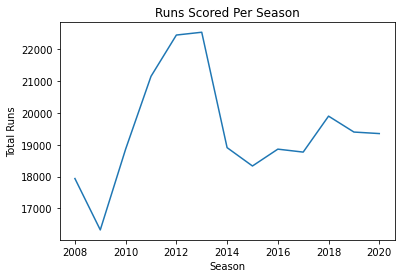

In [69]:
sns.lineplot(x='Season',y='Total Runs',data=runs_per_season)
plt.title('Runs Scored Per Season')

Text(0.5, 1.0, 'Runs Scored per Match')

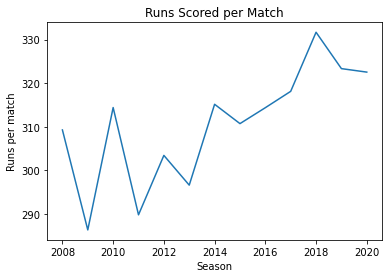

In [139]:
df=pd.concat([runs_per_season['Season'],match_per_season['Matches'],runs_per_season['Total Runs'],runs_per_season['Total Runs']/match_per_season['Matches']],axis=1)
df.rename(columns={0:'Runs per match'},inplace=True)
sns.lineplot(x='Season',y='Runs per match',data=df)
plt.title('Runs Scored per Match')

Text(0.5, 1.0, 'Toss Wins by Each Team')

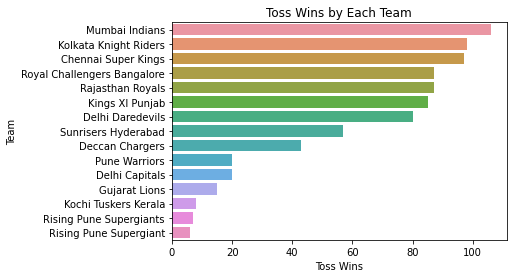

In [164]:
df=match_data['toss_winner'].value_counts()
df=df.reset_index().rename(columns={'index':'Team','toss_winner':'Toss Wins'})
sns.barplot(y='Team',x='Toss Wins',data=df)
plt.title('Toss Wins by Each Team')

Text(0.5, 1.0, 'Toss Decision Analysis')

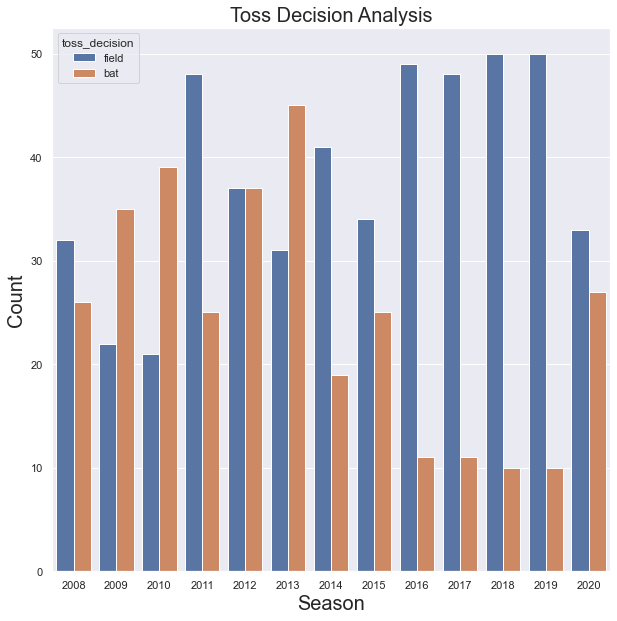

In [326]:
sns.countplot(x='Season',hue='toss_decision',data=match_data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel('Season',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Toss Decision Analysis',fontsize=20)

Text(0.5, 1.0, 'Match Result Analysis')

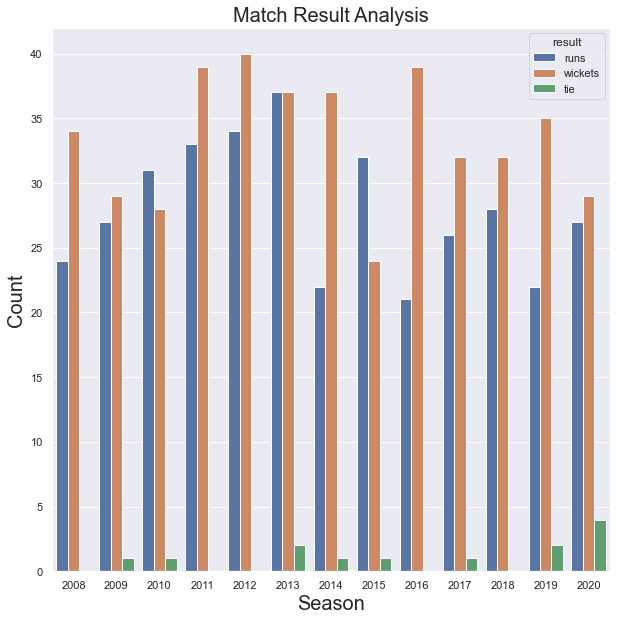

In [325]:
sns.countplot(x='Season',hue='result',data=match_data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel('Season',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Match Result Analysis',fontsize=20)

Text(0.5, 1.0, 'Match Result Analysis by Venue')

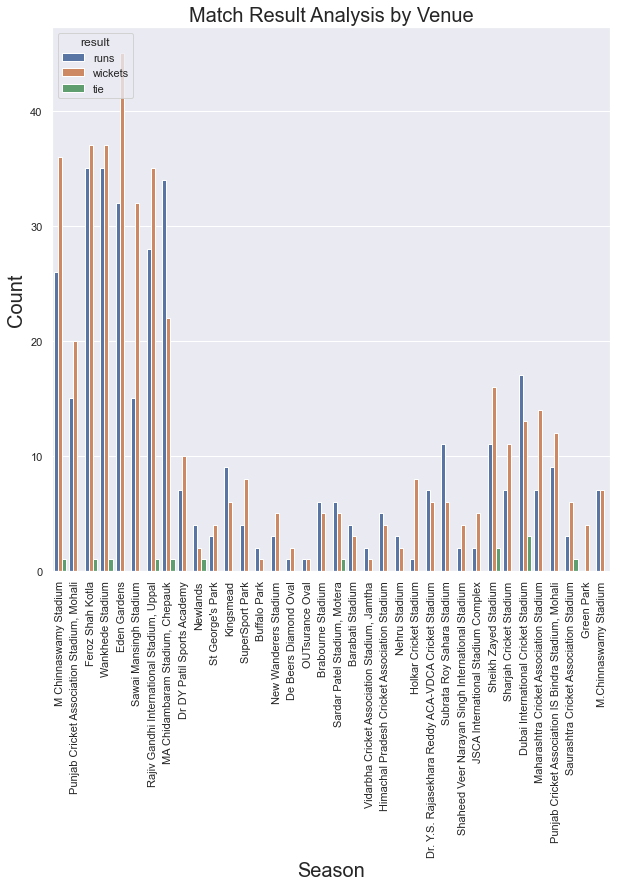

In [334]:
sns.countplot(x='venue',hue='result',data=match_data)
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel('Season',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=90)
plt.title('Match Result Analysis by Venue',fontsize=20)

In [354]:
match_data.winner[match_data['result']=='wickets'].mode()

0    Kolkata Knight Riders
dtype: object

In [355]:
match_data.winner[match_data['result']=='runs'].mode()

0    Mumbai Indians
dtype: object

In [356]:
match_data.winner[match_data['result']=='tie'].mode()

0    Kings XI Punjab
dtype: object

<AxesSubplot:ylabel='count'>

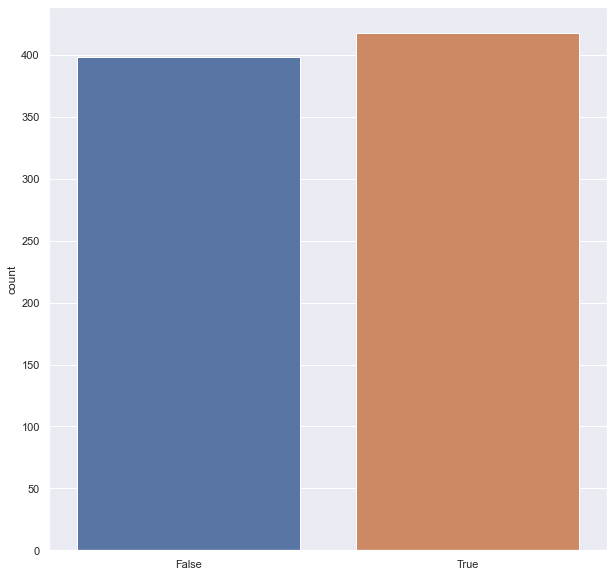

In [382]:
toss=match_data['toss_winner']==match_data['winner']
sns.countplot(x=toss)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Kolkata Knight Riders'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Delhi Daredevils'),
  Text(3, 0, 'Royal Challengers Bangalore'),
  Text(4, 0, 'Rajasthan Royals'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Deccan Chargers'),
  Text(7, 0, 'Mumbai Indians'),
  Text(8, 0, 'Pune Warriors'),
  Text(9, 0, 'Kochi Tuskers Kerala'),
  Text(10, 0, 'Sunrisers Hyderabad'),
  Text(11, 0, 'Rising Pune Supergiants'),
  Text(12, 0, 'Gujarat Lions'),
  Text(13, 0, 'Rising Pune Supergiant'),
  Text(14, 0, 'Delhi Capitals')])

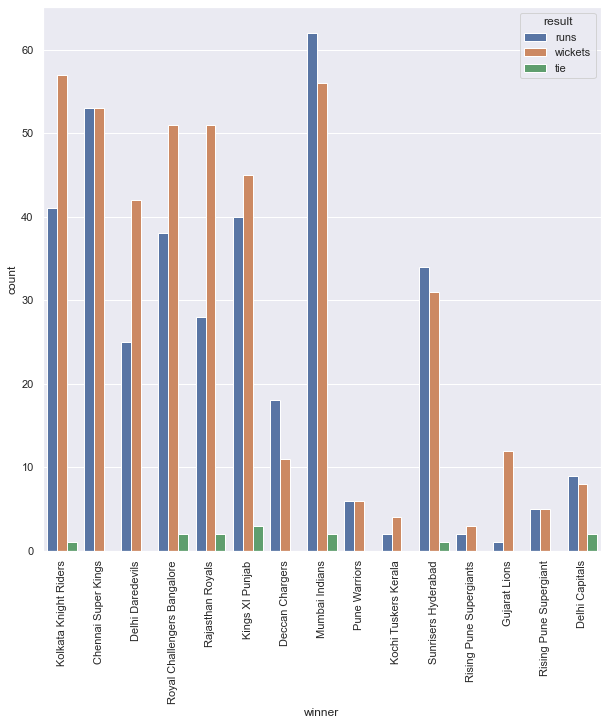

In [389]:
match_data.head()
sns.countplot(x='winner',hue='result',data=match_data)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='result', ylabel='count'>

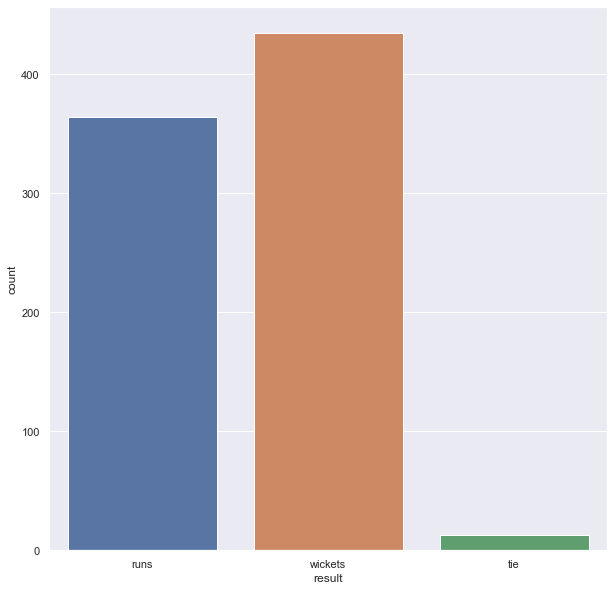

In [395]:
sns.countplot(x=match_data['result'],data=match_data)

In [430]:
player=ball_data['batsman']=='SK Raina'
raina_df=ball_data[player]
raina_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
246,335983,1,10,3,SK Raina,MEK Hussey,PP Chawla,2,0,2,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
247,335983,1,10,4,SK Raina,MEK Hussey,PP Chawla,0,0,0,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
248,335983,1,10,5,SK Raina,MEK Hussey,PP Chawla,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
249,335983,1,10,6,SK Raina,MEK Hussey,PP Chawla,4,0,4,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab
253,335983,1,11,4,SK Raina,MEK Hussey,K Goel,6,0,6,0,0,NaN,NaN,NaN,NaN,Chennai Super Kings,Kings XI Punjab


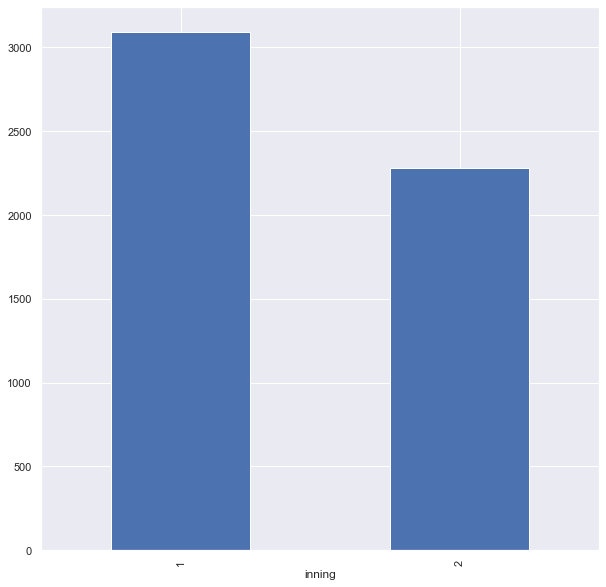

In [468]:
inning_run=raina_df.groupby(['inning'])['batsman_runs'].sum().plot(kind='bar')

<AxesSubplot:ylabel='dismissal_kind'>

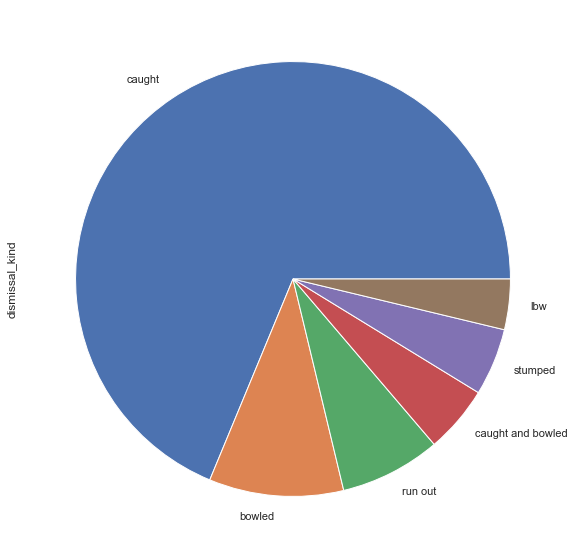

In [502]:
raina_df['dismissal_kind'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Run Scoring Types')

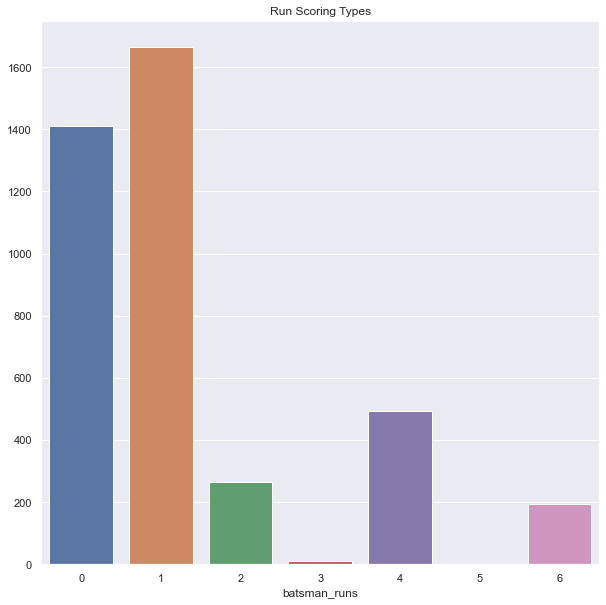

In [489]:
df=raina_df.groupby(['batsman_runs'])['total_runs'].count()
sns.barplot(x=df.index,y=df.values)
plt.title('Run Scoring Types')

Text(0.5, 1.0, 'Top Runscorers')

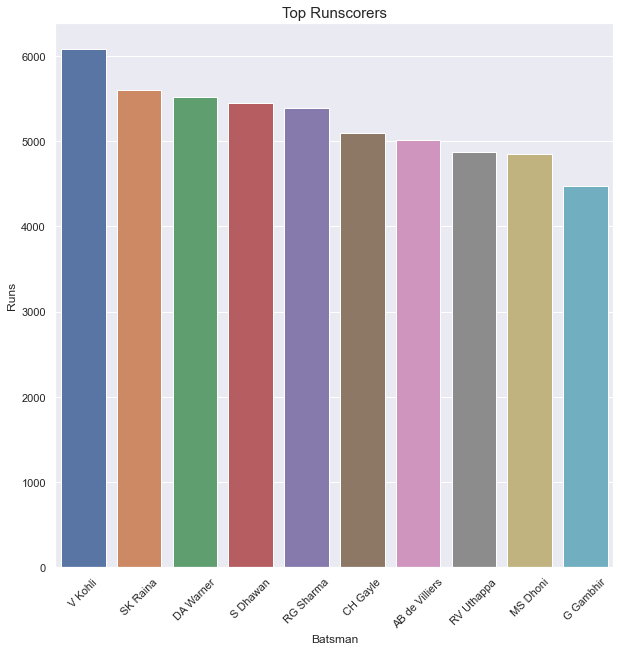

In [496]:
data=ball_data.groupby(['batsman'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False).head(10)
data.rename(columns={'batsman':'Batsman','total_runs':'Runs'},inplace=True)
sns.barplot(x='Batsman',y='Runs',data=data)
plt.xticks(rotation=45)
plt.title('Top Runscorers',fontsize=15)

Text(0.5, 1.0, 'Top Bowlers')

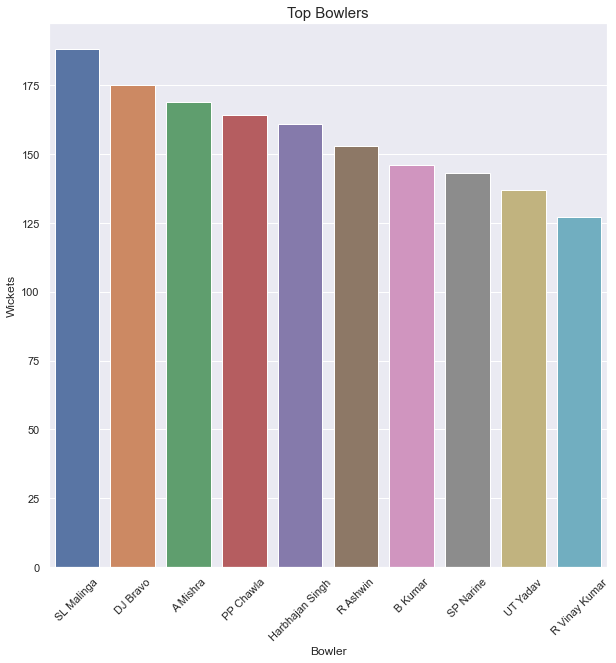

In [522]:
result=ball_data.groupby(['bowler'])['is_wicket'].sum().reset_index().sort_values(by='is_wicket',ascending=False).head(10)
result.rename(columns={'bowler':'Bowler','is_wicket':'Wickets'},inplace=True)
sns.barplot(x='Bowler',y='Wickets',data=result)
plt.xticks(rotation=45)
plt.title('Top Bowlers',fontsize=15)

Text(0.5, 1.0, 'Most Sixes')

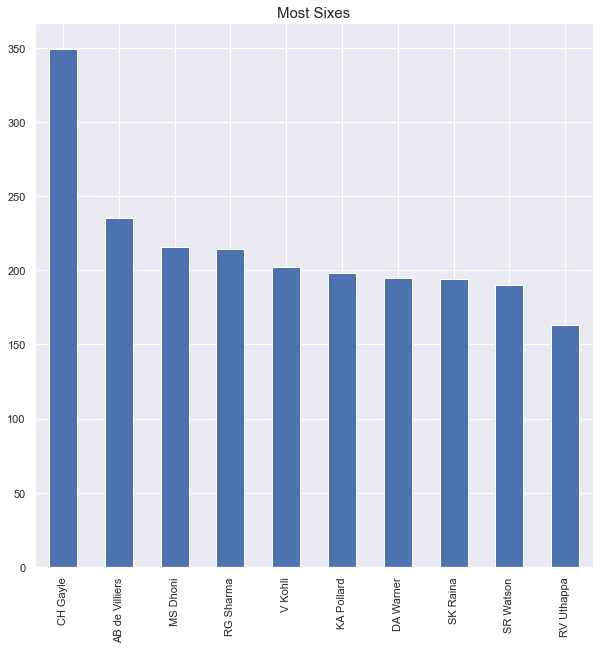

In [539]:
ball_data.batsman[ball_data['batsman_runs']==6].value_counts().head(10).plot(kind='bar')
plt.title('Most Sixes',fontsize=15)

Text(0.5, 1.0, 'Most Dot Balls')

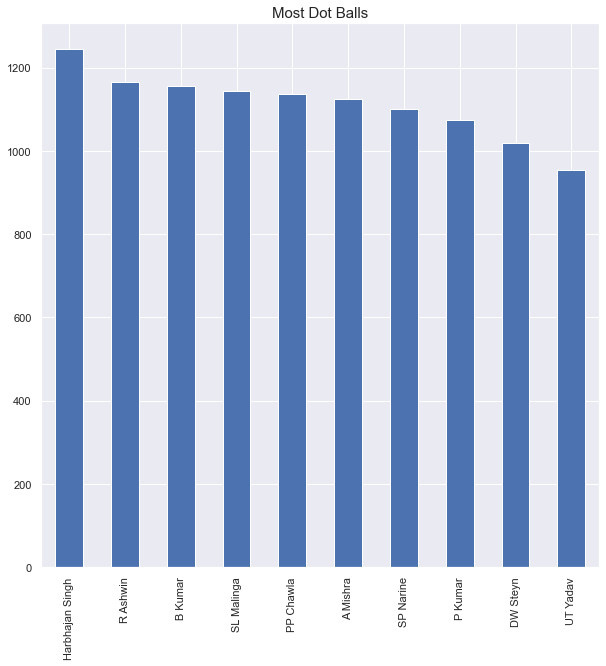

In [544]:
ball_data.bowler[ball_data['total_runs']==0].value_counts().head(10).plot(kind='bar')
plt.title('Most Dot Balls',fontsize=15)

<AxesSubplot:>

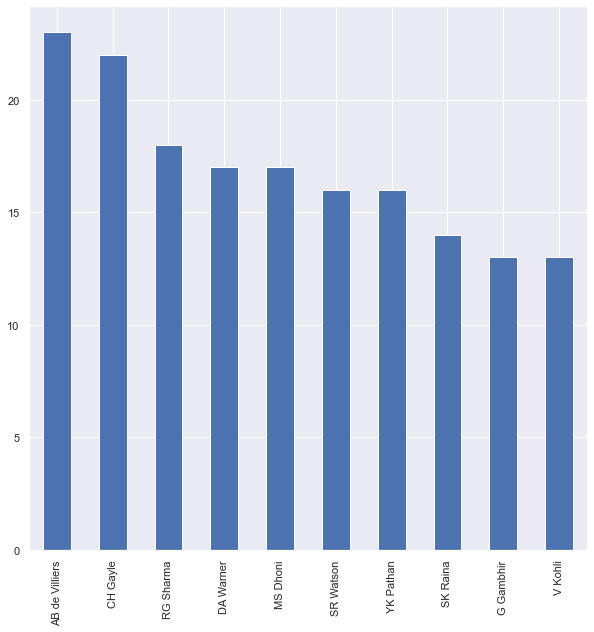

In [553]:
match_data.head()
match_data['player_of_match'].value_counts().head(10).plot(kind='bar')